In [2]:
import numpy as np
import torch
from models import *
from dataset_loader import *
import tqdm
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt


/Users/colinkalicki/opt/anaconda3/envs/local_nmt/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from util import *
import pandas as pd
df = pd.read_csv('full_df.csv')
df.columns
df['age buckets'] = 'placeholder'

In [39]:
df.loc[(df['age'] > 9), 'age buckets'] = '9+'
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,video_key,child_id,ASD,age,gender,VideoDuration,VideoFrameRate,...,head_preds_2,eye_results_2,face_results_2,labels,int_fusion,late_fusion,head_preds,eye_results,face_results,age buckets
0,0,0,0,cfcanedo@gmail.com/1603640944/GuessWhat.mp4,cfcanedo@gmail.com__Anderson,1,5.0,Male,92.6,25.0,...,0.910546,0.170009,0.544616,1,1,0.909677,0.909677,0.170009,0.544616,4-6
1,1,1,1,%2B16383224499/1607082139208/GuessWhat.mp4,+16383224499__Jovina,0,10.0,Female,57.4,30.0,...,0.153048,0.678888,0.543427,0,0,0.146519,0.146519,0.678888,0.543427,9+
2,2,2,2,_REVIEWED/remote_participants/kfujii0422%40gma...,kfujii0422@gmail.com__Hatsuho,1,3.0,Female,87.5,25.6,...,0.419489,0.175696,0.544616,1,0,0.346931,0.346931,0.175696,0.544616,0-3
3,3,3,3,knitsandgiggles5@gmail.com/1614203203/GuessWha...,knitsandgiggles5@gmail.com__Henrik Fotis,1,9.0,Male,93.6,25.0,...,0.157413,0.314968,0.544600,1,0,0.143285,0.143285,0.314968,0.544600,7-9
4,4,4,4,tami_mcin@hotmail.com/1587824572/GuessWhat.mp4,tami_mcin@hotmail.com__Adrian,1,7.0,Male,93.5,30.0,...,0.656792,0.677862,0.544556,1,1,0.743214,0.743214,0.677862,0.544556,7-9
5,5,5,5,_REVIEWED/remote_participants/kfujii0422%40gma...,kfujii0422@gmail.com__Hatsuho,1,3.0,Female,84.7,24.4,...,0.896636,0.264371,0.543815,1,1,0.894897,0.894897,0.264371,0.543815,0-3
6,6,6,6,_REVIEWED/Testing_ProcessComplete/katiarendong...,katiarendongeorge@gmail.com__Natasha,0,4.0,Female,87.6,29.9,...,0.248002,0.320466,0.544592,0,0,0.155395,0.155395,0.320466,0.544592,4-6
7,7,7,7,_REVIEWED/Testing_ProcessComplete/knitsandgigg...,knitsandgiggles5@gmail.com__Henrik Fotis,1,9.0,Male,88.6,25.0,...,0.522124,0.477348,0.544602,1,1,0.742474,0.742474,0.477348,0.544602,7-9
8,8,8,8,_REVIEWED/Testing_ProcessComplete/keepitsimple...,keepitsimpledmv@gmail.com__Julian,0,7.0,Male,88.7,25.0,...,0.160240,0.656244,0.544526,0,0,0.110689,0.110689,0.656244,0.544526,7-9
9,9,9,9,_REVIEWED/remote_participants/rhondac1976%40ya...,rhondac1976@yahoo.com__Nicholas,1,2.0,Male,87.5,29.9,...,0.139488,0.705326,0.544606,1,0,0.089966,0.089966,0.705326,0.544606,0-3


0.6860264519838988
0.6929411764705883
0.6863636363636363
0.6904761904761905
0.6863636363636363
late fusion
0.6326530612244898
0.6481481481481481
0.6363636363636364
0.6428571428571429
0.5977272727272727
simple models
0.5977272727272727
face acc + 0.5714285714285714
0.6886363636363636
0.5909090909090909


UnboundLocalError: local variable 'fig' referenced before assignment

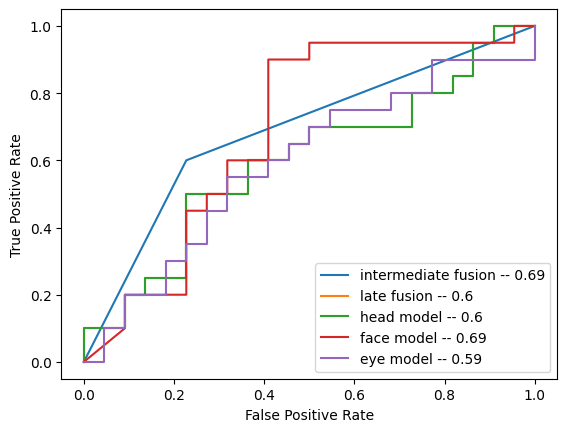

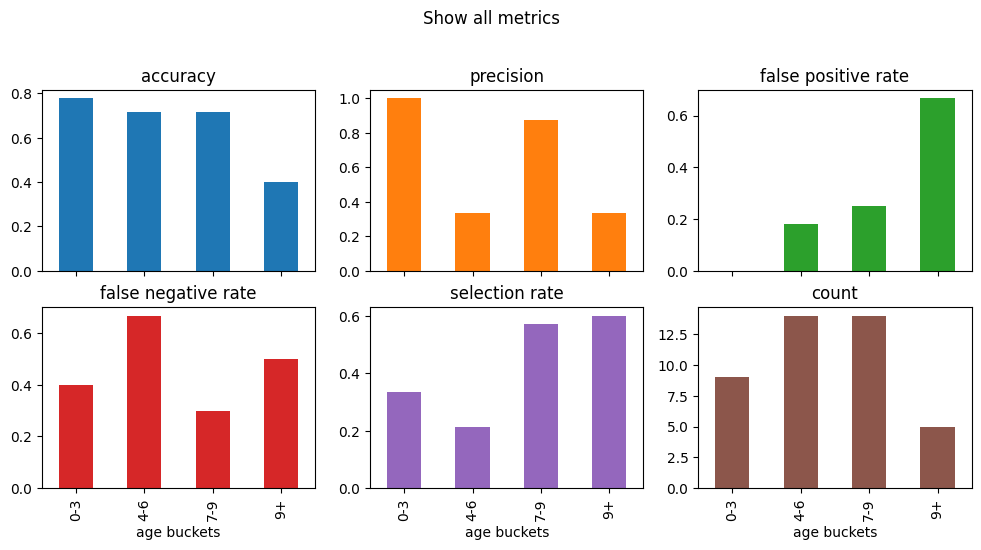

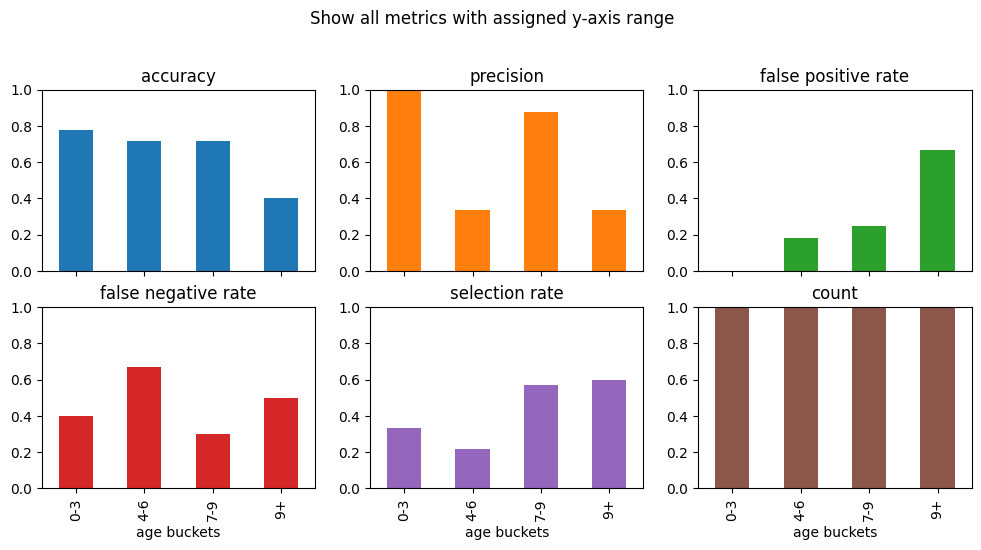

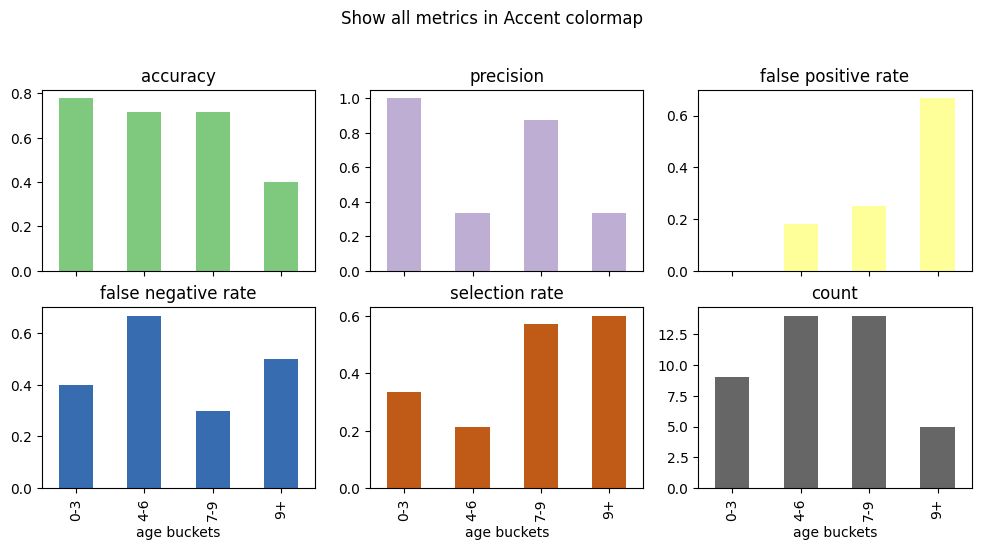

In [40]:
import matplotlib.pyplot as plt
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(df['ASD'], df['int_fusion'])

plt.plot(fpr, tpr, label = 'intermediate fusion -- '+ str(round(metrics.auc(fpr, tpr),2)))
print(f1_score(df['labels'], np.round(df['int_fusion']), average="macro"))
print(precision_score(df['labels'], np.round(df['int_fusion']), average="macro"))
print(recall_score(df['labels'], np.round(df['int_fusion']), average="macro"))
print(accuracy_score(df['labels'], np.round(df['int_fusion'])))
print(metrics.auc(fpr, tpr))
print('late fusion')
fpr, tpr, thresholds = roc_curve(df['ASD'], df['late_fusion_2'])
plt.plot(fpr, tpr, label = 'late fusion -- ' + str(round(metrics.auc(fpr, tpr),2)))
print(f1_score(df['labels'], np.round(df['late_fusion_2']), average="macro"))
print(precision_score(df['labels'], np.round(df['late_fusion_2']), average="macro"))
print(recall_score(df['labels'], np.round(df['late_fusion_2']), average="macro"))
print(accuracy_score(df['labels'], np.round(df['late_fusion_2'])))
print(metrics.auc(fpr, tpr))
print('simple models')
fpr, tpr, thresholds = roc_curve(df['ASD'], df['head_preds_2'])
plt.plot(fpr, tpr, label = 'head model -- ' + str(round(metrics.auc(fpr, tpr),2)))
print(metrics.auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(df['ASD'], df['face_results'])
print('face acc + ' + str(accuracy_score(df['labels'], np.round(df['face_results']))))
plt.plot(fpr, tpr, label = 'face model -- ' + str(round(metrics.auc(fpr, tpr),2)))
print(metrics.auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(df['ASD'], df['eye_results'])
plt.plot(fpr, tpr, label = 'eye model -- ' + str(round(metrics.auc(fpr, tpr),2)))
print(metrics.auc(fpr, tpr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

#confidence_interval_plot(df, df['ASD'], np.round(df['int_fusion']), 'age', interval=False)
metrics_plots(df, df['ASD'], np.round(df['int_fusion']), 'age buckets', save_path='age.png')

In [1]:
df

NameError: name 'df' is not defined

In [ ]:
from sklearn.calibration import calibration_curve
true_pos, pred_pos = calibration_curve(np.array(df['ASD']), df['int_fusion'][:,1], n_bins=10)
true_pos_aa, pred_pos_aa = calibration_curve(df['ASD'], df['int_fusion'][:,1][np.where(df['gender'] == 'Male')], n_bins=10)
true_pos_a, pred_pos_a = calibration_curve(df['ASD'], df['int_fusion'][:,1][np.where(df['gender'] > 'Female')], n_bins=10)

plt.plot(pred_pos, true_pos, marker='o', label ='no split')
plt.plot(pred_pos_aa, true_pos_aa, 'g', marker='o', label ='African American')
plt.plot(pred_pos_a, true_pos_a, 'r', marker='o', label ='Asian')

plt.legend(loc = 'lower right')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration Curve')
plt.show()